## Установка PySpark

In [30]:
# Установка pyspark
!pip install pyspark
# Импорт SparkSession
from pyspark.sql import SparkSession
# Создание сеанса Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext
spark

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [126]:
iris = spark.read.csv('iris.CSV', header=True, inferSchema=True)

In [127]:
iris.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [128]:
iris.groupby('variety').max('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [34]:
iris.groupby('variety').min('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [35]:
iris.groupby('variety').avg('sepal_length', 'sepal_width', 'petal_length', 'petal_width').show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [72]:
import matplotlib.pyplot as plt


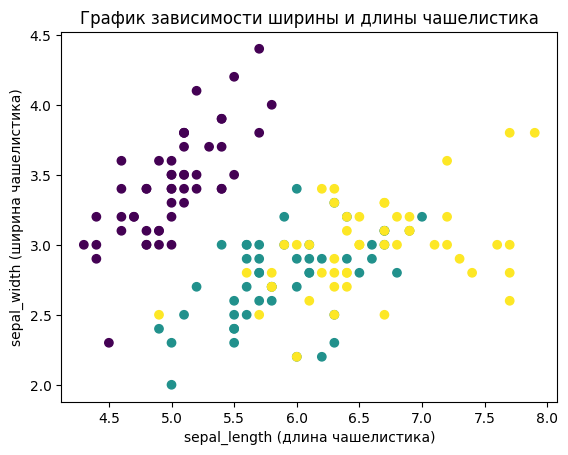

In [79]:
plt.scatter(x=iris[['sepal_length']].collect(), y=iris[['sepal_width']].collect(), c=iris[['variety_num']].collect())
plt.title('График зависимости ширины и длины чашелистика')
plt.xlabel('sepal_length (длина чашелистика)')
plt.ylabel('sepal_width (ширина чашелистика)')
plt.show()

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

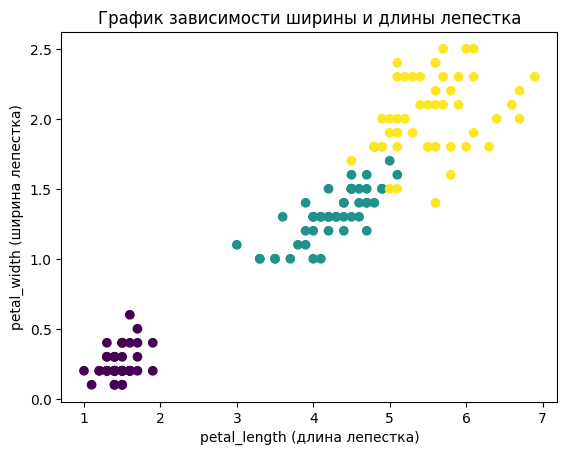

In [71]:
plt.scatter(x=iris[['petal_length']].collect(), y=iris[['petal_width']].collect(), c=iris[['variety_num']].collect())
plt.title('График зависимости ширины и длины лепестка')
plt.xlabel('petal_length (длина лепестка)')
plt.ylabel('petal_width (ширина лепестка)')
plt.show()

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [39]:
from pyspark.sql.functions import when

In [92]:
# Для SETOSA  согласно вычислениями проведенными выше можно выбрать: PETAL_LENGTH (меньше 2.0) или  PETAL_WIDTH (меньше 0.7)

# Формирование отдельного результата/ запрос очень похож на запрос как sql(можно выбрать отдельно столцы)
result = iris.select('variety_num', when(iris['petal_width'] <= 0.6, 'Setosa').otherwise('unknown').alias('prediction'))
result.show(5)

+-----------+----------+
|variety_num|prediction|
+-----------+----------+
|          0|    Setosa|
|          0|    Setosa|
|          0|    Setosa|
|          0|    Setosa|
|          0|    Setosa|
+-----------+----------+
only showing top 5 rows



In [106]:
# PETAL_LENGTH (меньше 2.0 или <= 1.9) или  PETAL_WIDTH (меньше 0.7 или <= 0.6)
# Создание столбца в df
result_iris = iris.withColumn('Category', when(iris['petal_width'] < 0.7, 'Setosa').otherwise('unknown'))
result_iris.show(5)

+------------+-----------+------------+-----------+-------+-----------+--------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|Category|
+------------+-----------+------------+-----------+-------+-----------+--------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|  Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|  Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|  Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|  Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|  Setosa|
+------------+-----------+------------+-----------+-------+-----------+--------+
only showing top 5 rows



## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [110]:
# правильный класс Setosa
iris.where(iris['variety_num']==0).count()     # или
iris.where(iris['variety']=='Setosa').count()

50

In [108]:
# предсказанный класс Setosa
result_iris.where(result_iris['Category']=='Setosa').count()

50

In [111]:
# Предсказанный какой-то другой класс
result_iris.where(result_iris['Category']!='Setosa').count()

100

In [136]:
result_iris.where(result_iris['Category']=='unknown').count()

100

In [139]:
# 50 из таблицы iris == из новой таблицы result_iris
iris.where(iris['variety']=='Setosa').count() == result_iris.where(result_iris['Category']=='Setosa').count()

True

In [129]:
iris.createOrReplaceTempView('iris_table')

In [133]:
# Всего
spark.sql('select count(variety_num) from iris_table').show()

+------------------+
|count(variety_num)|
+------------------+
|               150|
+------------------+

